# 1. The EUI data analysis tutorial
Welcome to part 1 of the Extreme Ultraviolet Imager (EUI) data analysis tutorial. In this set of Jupyter notebooks, we are going to have some fun with EUI data coming from it's three telescopes: 
- Full Sun Imager (FSI). 
  - This telescope has a field of view of 3.8 degrees, which means it can always capture the full solar disc, even when it's close to the Sun. It has a filter wheel that allows it to look at the Sun in either 17.4 or 30.4 nm. The filter wheel can also be used to block all the light getting to the detector. 
- High Resolution Imager Extreme UltraViolet (HRIEUV). 
  - This telescope has a field of view of approximately 0.28 degrees, and shows the Sun in high resolution 17.4 nm. It has a filter wheel that has two additional 17.4 nm filters, as well as an open position (no filter) and a blocking position. Nominally, the filter wheel is in the 17.4 nm position to reduce the amount of light hitting the detector in between the exposures. The open position is used only when very high cadence is needed or when we are imaging quiet Sun areas.
- High Resolution Imager Lyman Alpha (HRILYA)
  - This telescope has a field of view of approximately 0.28 degrees, and shows the Sun in high resolution in 121.6 nm. In front of the detector is an image intensifier.

## Python packages and data
These tutorials can be run in a Jupyter Notebook. They were tested in an up-to-date miniconda environment. Please make sure the  following packets are installed in your python environment (from within a conda prompt, type "pip install ..." replacing ... with the names below ):
- matplotlib
- sunpy
- astropy
- opencv-python
- pandas
- sqlite3
- scipy
- soloEUI ( pip install soloEUI --extra-index-url https://gitlab-as.oma.be/api/v4/projects/581/packages/pypi/simple )

In the same conda prompt, you can install Jupyter Notebook by typing "pip install notebook". To start Jupyter Notebook, you can type "jupyter notebook", which will open a browser you can use to open a Jupyter Notebook file.

## Data
Personally I like to have the data that I work with available locally, and here I will have a few of those files available in several local data directories. So if you run this notbook on your own computer, you can get all the required files from this [shared directory](https://cloud-as.oma.be/index.php/s/G4X42GPY79bct4d). Download the data.zip file, and extract this file in the same location as these tutorials, such that you end up with all the data_* directories next to your notebook ipynb files. Of course it's also possible to retrieve released EUI data directly through the web, and throughout this tutorial there will be a few instances where we will use Fido (part of SunPy) to search and retrieve EUI files based on their descriptor. 


We will be playing with EUI data that is part of [release 5.0](https://www.sidc.be/EUI/data/latest_release_notes.html), but we will also look at some preliminary calibration files that are not (yet) available outside of this tutorial. Release 6.0 is currently scheduled for the end of the year, but in the next few weeks we'll be adding data - that we only recently got down - to release 5.0. This new data will be added to our websites, but will of course also be available through the SOAR.

## Levels
Every release consists of level 1, 2 and 3 files. The L1 files are uncalibrated image files, but with housekeeping meta-data added. The L2 files contain calibrated image data, created with our euiprep software. The calibration process consists of  dark/flat correction, correcting for geometric distortions, normalizing by exposure time, performing limb-fitting for FSI image, etc. The L3 files are JP2000 files meant for quicklook viewing in for example JHelioViewer. In this tutorial we are mostly going to work with L2 data, and this will likely be the only data you will need, but we will also show how to use euiprep to create L2 files from L1 files with non-default euiprep settings.

Unfortunately, not all L1 data has been turned into L2 data, because - for example - a matching flat-field was not yet available for images with custom dimensions. In the future, the euiprep calibration software will be updated to calibrate as many of the L1 solar images as possible creating new L2 files, but in the mean time it could be that only uncalibrated L1 files are available. We will briefly show how to manually 'calibrate' some of this data, where we will look at the s data of March 7, 2022. 

## EUI Science Data description

Information on the descriptors and all EUI specific FITS keywords can be found in the EUI DPDD that is available on the [Archive Support Data confluence page](https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Archive+Support+Data#ArchiveSupportData-Understandingthedata.1).
The Solar Orbiter specific FITS keywords are explained in
[Metadata Definition for Solar Orbiter Science Data](https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Metadata+Definition+for+Solar+Orbiter+Science+Data). Below we will also give a short overview and explanation of the most frequently used descriptors and FITS keywords to learn about the most common FSI, HRI EUV, and HRI LYA images available.

### FSI
The large majority of the FSI images are synoptic solar images (IMGTYPE = 'solar image') taken year round. The typical image size is 3072 x 3072 pixels. THe data is typically lossy compressed, but to a reasonably high quality. The images are also usually reconstructed on-board from low-gain and high-gain data, producing a 15-bit dynamic range image. The following descriptors are the most common ones:

- eui-fsi174-image: An FSI image with the filterwheel placed at the 17.4 nm position.
- eui-fsi304-image: An FSI image with the filterwheel placed at the 30.4 nm position.

The onboard flat-field correction for FSI images is not perfect. A left-over grid can be seen in the darkest areas of the image with a DN of about 1.

Sometimes FSI takes low- or high-gain only images (GAINCOMB keyword is not 'combined', but 'low-only' or 'high-only'). Those images are not reconstructed on-board, but when creating Level 2 images from that data, they are calibrated on-ground. 



### HRI LYA
The bulk of the HRI LYA images are solar images taken during remote sensing windows. The images are 2 x 2 binned, resulting in an image that is 1024 x 1024 pixels. The quality of the LYA images has decreased considerably during the March 2022 remote sensing window, with images getting more blurry the closer we get to the Sun. We are still investigating this, but this appears to be caused by changes in temperature of the entrance filter. Preliminary analysis of June 12 data shows us that the resolution has been restored to that of before the March remote sensing window.

This is the most common HRI LYA descriptor.
- eui-hrilya1216-image

### HRI EUV
The bulk of the HRI EUV images are solar images taken during remote sensing windows. The images have a resolution of 2048 x 2048 pixels, and are either reconstructed on-board to create a 15-bit high dynamic range image (GAINCOMB='combined') or high-gain only (GAINCOMB='high-only'). There is currently no on-board flat-field correction applied for reconstructed HRI EUV images, and for those images that is also (not yet) applied in Level 2 images.   

The most common HRI EUV descriptors are:
- eui-hrieuv174-image 
  - The filterwheel is placed in the 174 position.
- eui-hrieuvnon-image
  - The filterwheel is placed in the open position (there is no filter), resulting in ~2x brighter images. We typically only use the open position when we are trying to image at the very highest cadence or when imaging relatively dark areas of the Sun.

There are a few atypical HRI EUV images that have not yet made it into Level 2 images, because the calibration products are not yet available. These include the March 6 mosaic data that we will have a look at later in this tutorial.

## Enough talking...
Enough talking, let's get this notebook started by importing some packages and functions we are going to be using throughout the first part of this tutorial.

In [43]:
%matplotlib notebook

import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, SqrtStretch, PowerStretch
import sunpy.map
import sunpy_soar
from sunpy.net import Fido
import sunpy.net.attrs as a

import numpy as np

# Big plots please..
plt.rcParams["figure.figsize"] = (10, 10)


## Retrieving and looking at data
In this section we are going to retrieve some EUI images using the Fido search tool that is part of SunPy.

### HRI LYA 


In [44]:
instrument = a.Instrument('EUI')
time = a.Time('2022-03-06 18:0:00', '2022-03-06 18:10:00')
level = a.Level(2)
product = a.soar.Product('EUI-HRILYA1216-IMAGE')

result = Fido.search(instrument & time & level & product)
print(result)

Results from 1 Provider:

10 Results from the SOARClient:

Instrument     Data product     Level ...         End time        Filesize
                                      ...                          Mbyte  
---------- -------------------- ----- ... ----------------------- --------
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:09:35.288    1.423
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:08:35.288    1.426
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:07:35.288     1.44
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:06:35.288    1.443
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:05:35.287    1.449
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:04:35.287    1.452
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:03:35.287    1.449
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:02:35.287    1.261
       EUI EUI-HRILYA1216-IMAGE    L2 ... 2022-03-06 18:01:35.287     1.44
       EUI EUI-HRILYA1216-IMAGE    L2 ...

We will attempt to download the data.

In [45]:
files = Fido.fetch(result)


Now that we have retrieved the data, let's first have a look at just one of the files.

<IPython.core.display.Javascript object>


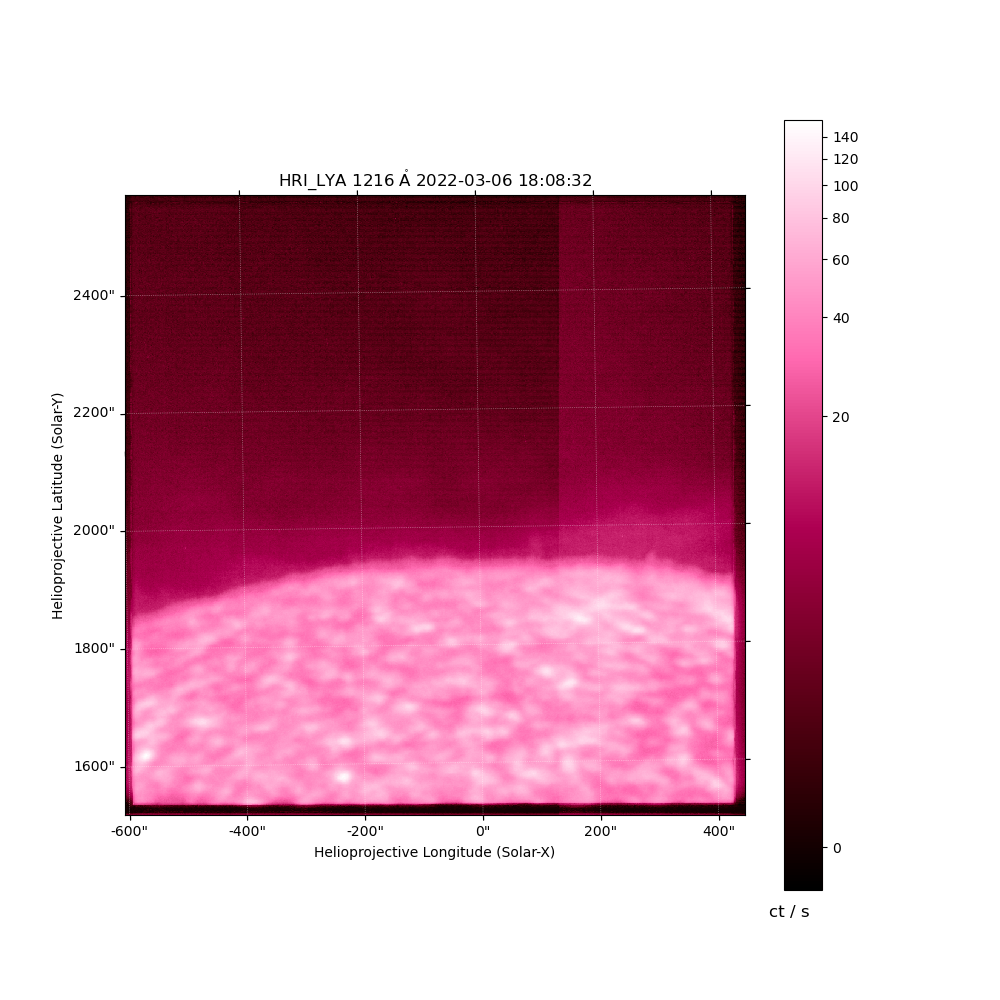

In [46]:
map = sunpy.map.Map(files[0])
map.peek()


We can also directly open all of these at once as a SunPy map sequence, and plot them as an animation.

<IPython.core.display.Javascript object>


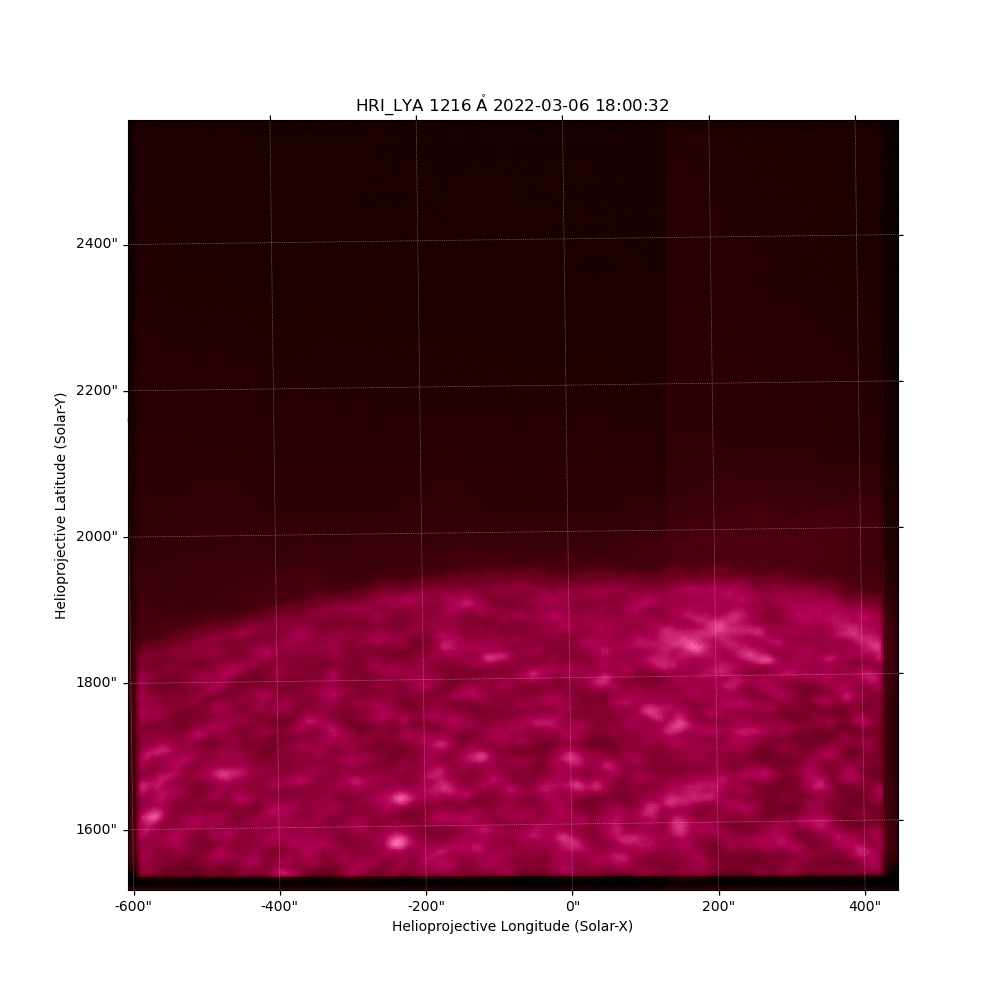

In [47]:
sequence = sunpy.map.Map(files, sequence=True)

for each_map in sequence:
    each_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=300, stretch=SqrtStretch())
plt.figure()
ani = sequence.plot()

plt.show()

Unfortunately, the resolution of the HRI LYA images is somewhat limited. Even outside of the remote sensing window - with the further reduced resolution of the instrument - we always bin the images 2 x 2 to reduce the required telemetry without further sacrificing on image quality.

The HRI LYA instrument has another problem in that the image intensifier causes an after image to show, meaning that each image we see is the result of whatever the telescope should see right now and what it saw before the exposure started. This is likely causing some additional blurring (due to space craft jitter) but this also makes it difficult to analyze fast brightness changes. 

HRI LYA images are typically recorded with the low-gain channel only. 

### HRI EUV
We will repeat the exercise for retrieving and displaying HRI EUV data.

In [48]:
instrument = a.Instrument('EUI')
time = a.Time('2022-03-27 21:24:00', '2022-03-27 21:50:00')
level = a.Level(2)
product = a.soar.Product('EUI-HRIEUV174-IMAGE')

result = Fido.search(instrument & time & level & product)
print(result)

Results from 1 Provider:

26 Results from the SOARClient:

Instrument     Data product    Level ...         End time        Filesize
                                     ...                          Mbyte  
---------- ------------------- ----- ... ----------------------- --------
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:49:13.054    6.152
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:48:13.054    6.584
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:47:13.054    6.523
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:46:13.055    6.163
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:45:13.128     6.14
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:44:13.053    6.388
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:43:13.053    6.189
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:42:13.052    6.163
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 21:41:13.077    5.973
       EUI EUI-HRIEUV174-IMAGE    L2 ... 2022-03-27 2

In [49]:
files = Fido.fetch(result)

And again we have a look at the resulting sequence

<IPython.core.display.Javascript object>


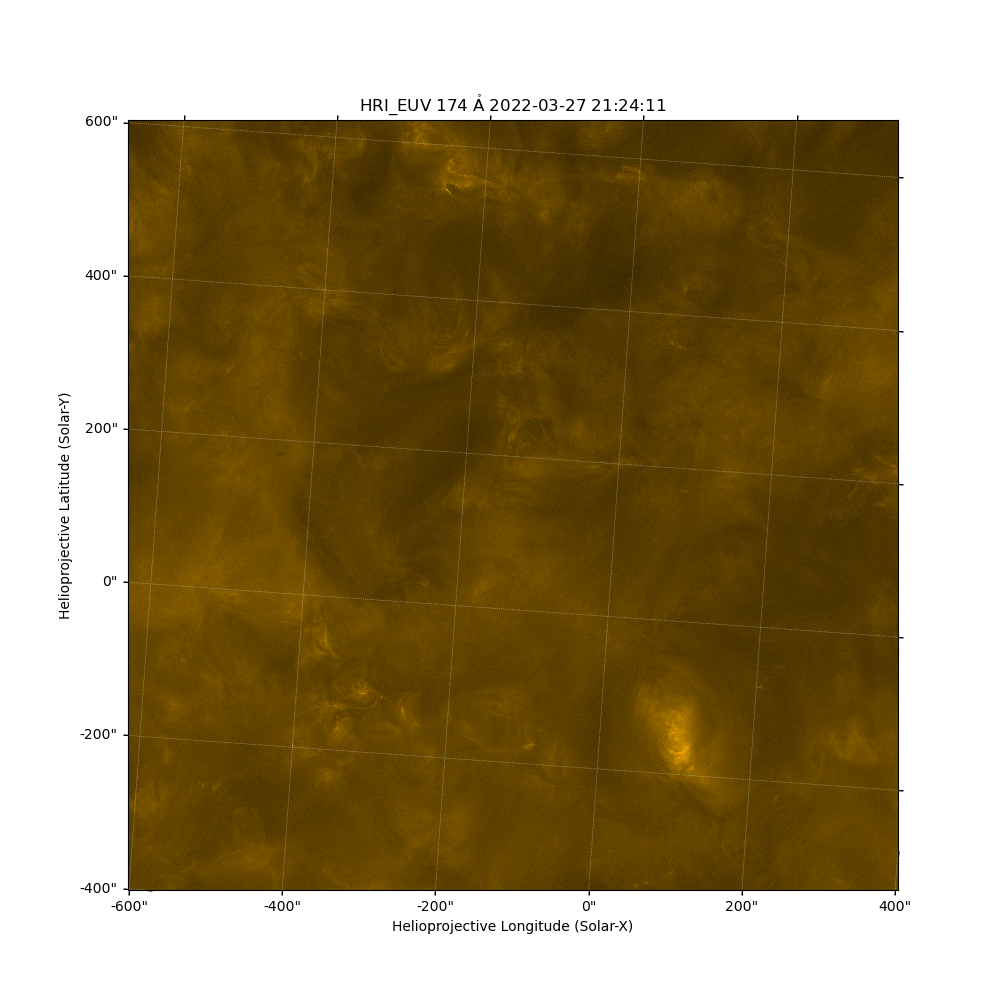

In [50]:
sequence = sunpy.map.Map(files, sequence=True)
for each_map in sequence:
    each_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=2000, stretch=SqrtStretch())
plt.figure()
ani = sequence.plot()

plt.show()

The HRI EUV instrument performs very well and the resolution is almost limited by the size of the pixels (~0.5 arc seconds). The HRI EUV detector is typically operated in combined gain mode, which means that on-board low-gain and high-gain pixels are combined into a resulting image with a high dynamic range. This requires the instrument to perform onboard calibration of the data, where it corrects for bias and column offsets, but currently it does not perform flat-field correction.

In part 4 of this tutorial we will create the start of an EUV Mosaic by combining low-gain and high-gain only images on ground, and we will show how we could manually calibrate these images. Exercises like these will hopefully improve the onboard calibration performance.

### FSI 
Just like the HRI EUV data, the low and high gain channels of the FSI instrument are combined onboard, which means that the images are also calibrated onboard. The process works well, but again there are some limitations. We will now try to retrieve and display some FSI data where the filter wheel was in one of the two 174 positions.

In [51]:
time = a.Time('2022-03-27 21:24:00', '2022-03-27 21:34:00')
level = a.Level(2)
product = a.soar.Product('EUI-FSI174-IMAGE')
result = Fido.search(instrument & time & level & product)

In [52]:
result
files = Fido.fetch(result)

We open the files as a SunPy map, and tell this map to normalize the image by heavily stretching the data between 0 and the 99.9 percentile file:

<IPython.core.display.Javascript object>


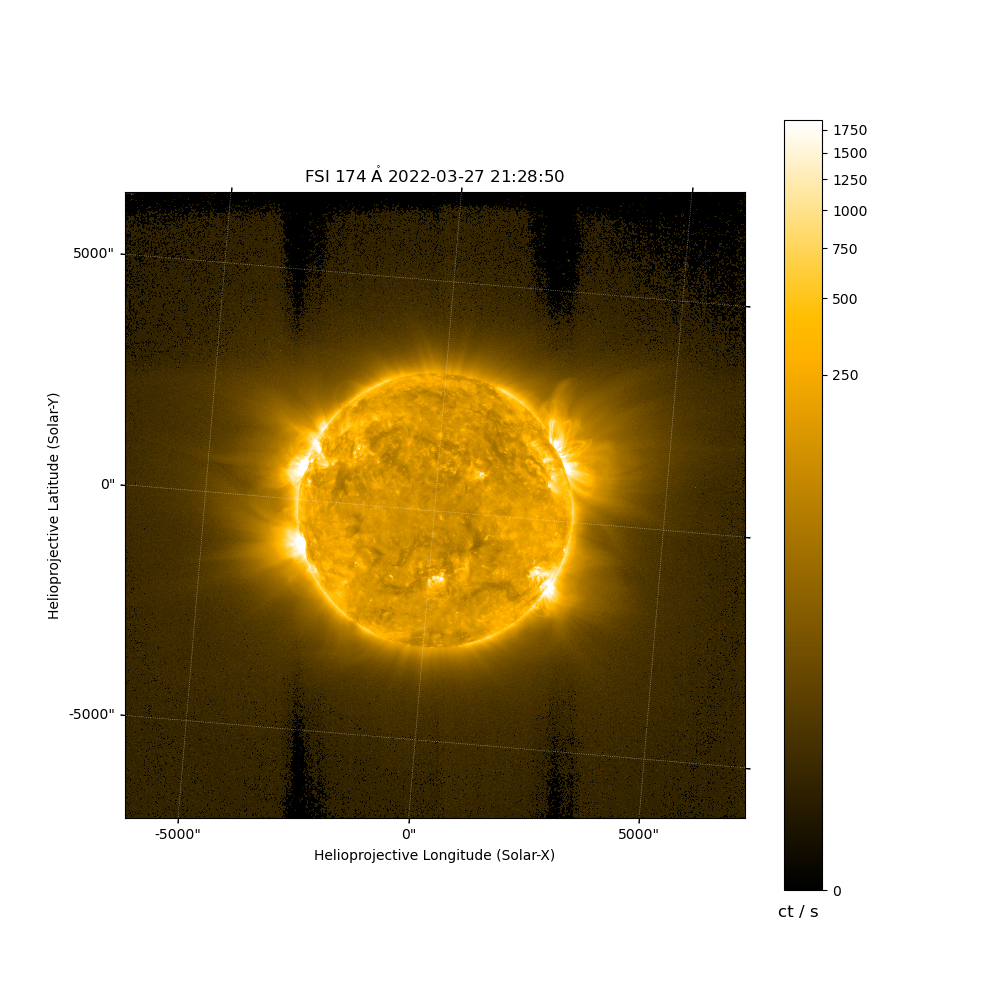

In [53]:
amap = sunpy.map.Map(files)
amap.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=np.percentile(amap.data,99.9), stretch=PowerStretch(0.2))
amap.peek()

We can see some typical dark bands that are detector artifacts caused by bright features visible on the solar limb. Another thing that stands out in FSI images, particularly when we are close to the Sun, is that the bottom ~ 75% of the image is a little bit (~ 1 DN) brighter than the top of the image. We believe this could be caused by a small light leak. We are still investigating these artifacts, and as we can see here they are currently not yet corrected for in L2 data. 

Now we will have a look at some interesting FSI 304 data. Here, the filter wheel was in one of the two 304 positions.

First we again search for data through Fido.

In [54]:
time = a.Time('2022-02-15 22:00:00', '2022-02-15 22:34:00')
level = a.Level(2)
product = a.soar.Product('EUI-FSI304-IMAGE')
result = Fido.search(instrument & time & level & product)

In [55]:
result

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize
,,,,,,,Mbyte
str3,str16,str2,str23,str23,str43,str52,float64
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:32:15.222,2022-02-15 22:32:25.222,solo_L2_eui-fsi304-image_20220215T223215222,solo_L2_eui-fsi304-image_20220215T223215222_V01.fits,2.661
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:30:15.222,2022-02-15 22:30:25.222,solo_L2_eui-fsi304-image_20220215T223015222,solo_L2_eui-fsi304-image_20220215T223015222_V01.fits,3.105
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:26:15.221,2022-02-15 22:26:25.221,solo_L2_eui-fsi304-image_20220215T222615221,solo_L2_eui-fsi304-image_20220215T222615221_V01.fits,3.044
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:24:15.221,2022-02-15 22:24:25.221,solo_L2_eui-fsi304-image_20220215T222415221,solo_L2_eui-fsi304-image_20220215T222415221_V01.fits,3.07
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:22:15.221,2022-02-15 22:22:25.221,solo_L2_eui-fsi304-image_20220215T222215221,solo_L2_eui-fsi304-image_20220215T222215221_V01.fits,3.036
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:20:15.220,2022-02-15 22:20:25.220,solo_L2_eui-fsi304-image_20220215T222015220,solo_L2_eui-fsi304-image_20220215T222015220_V01.fits,2.978
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:16:15.220,2022-02-15 22:16:25.220,solo_L2_eui-fsi304-image_20220215T221615220,solo_L2_eui-fsi304-image_20220215T221615220_V01.fits,3.139
EUI,EUI-FSI304-IMAGE,L2,2022-02-15 22:14:15.220,2022-02-15 22:14:25.220,solo_L2_eui-fsi304-image_20220215T221415220,solo_L2_eui-fsi304-image_20220215T221415220_V01.fits,3.139


In [56]:
files = Fido.fetch(result)

We ended up with 12 images that we are going to display. This time we again stretch the data (a lot!) to have a look at the faintest details in the image. We will also create a little animation of the result.

<IPython.core.display.Javascript object>


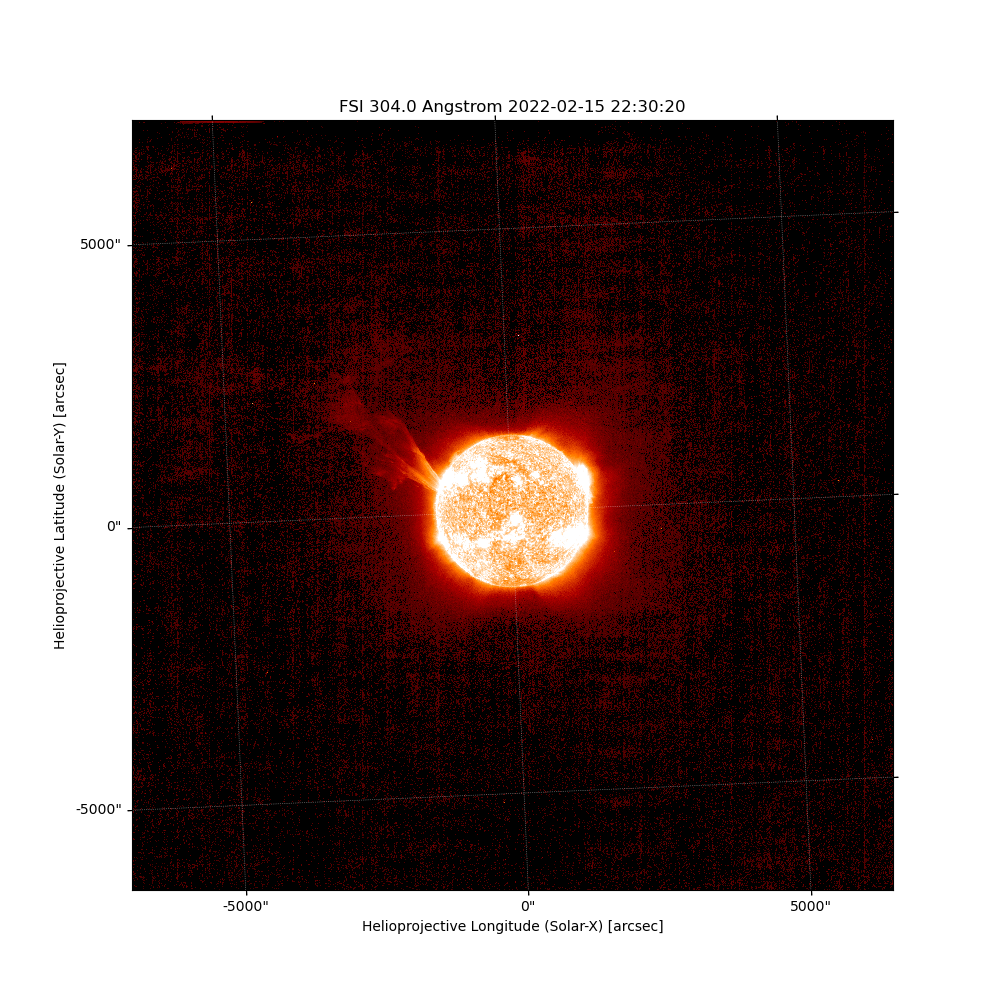

In [57]:
sequence = sunpy.map.Map(files, sequence=True)
for each_map in sequence:
    each_map.plot_settings['norm'] = ImageNormalize(vmin=0, vmax=100, stretch=PowerStretch(0.2))
    
    
plt.figure()
ani = sequence.plot(interval=500)
plt.show()

If you look closely, you can see a blocky pattern in the background of the image. This is caused by the flat-field correction not being applied correctly onboard. The brightness level of that artifact is only about 1 DN, which means it's only visible when heavily stretching the image, but 1 DN is enough to make it difficult to spot faint eruptions further out from the Sun. We are working on improving this onboard FSI flat-field. 